# Requests & BeautifulSoup Homework

Simply put, for our purposes, webscraping is used to make a dataset. So (big suprise) in this assignment you will be required to make dataset (woohoo :|). Don't worry I'll walk you through it

Before you continue read the following:

In this notebook I will walk you though how to make a dataset using Requests & BeautifulSoup. From the pre-recorded videos and in class activity you should already have a good understand of how you do this, so we will apply the stuff we learned from the videos into this assignment. 

We will be making a datasets from the following website: https://companiesmarketcap.com/usa/largest-companies-in-the-usa-by-market-cap/

Now lets take a look at this webpage. First off you can see that this page has the top 100 companies in the USA ranked by their market capitlaization. Market capitalization, sometimes referred to as market cap, is the total value of a publicly traded company's outstanding common shares owned by stockholders. No I am not a stocks wiz, I just copy and pasted that definition from this [Wikipedia Article](https://en.wikipedia.org/wiki/Market_capitalization). 

Next, notice how that webpage has a good amount of data, there is the Company name, the company stock ticker, the current price of the stock, etc.  
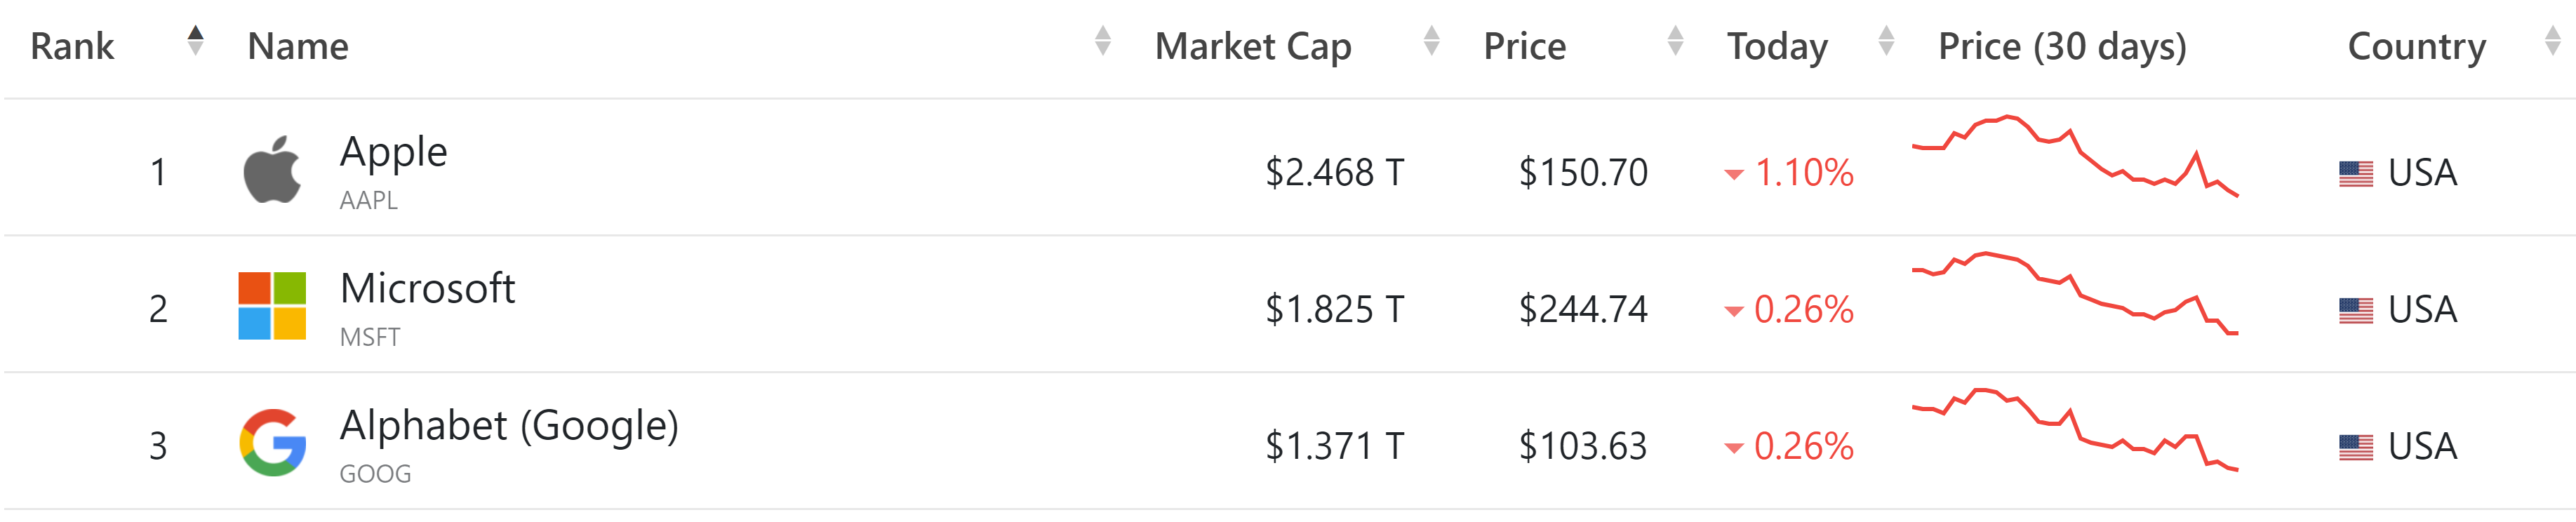

There is even more data if you click the acutal company name. When you click the name you get more info on the comapany, for example, lets click on Apple.
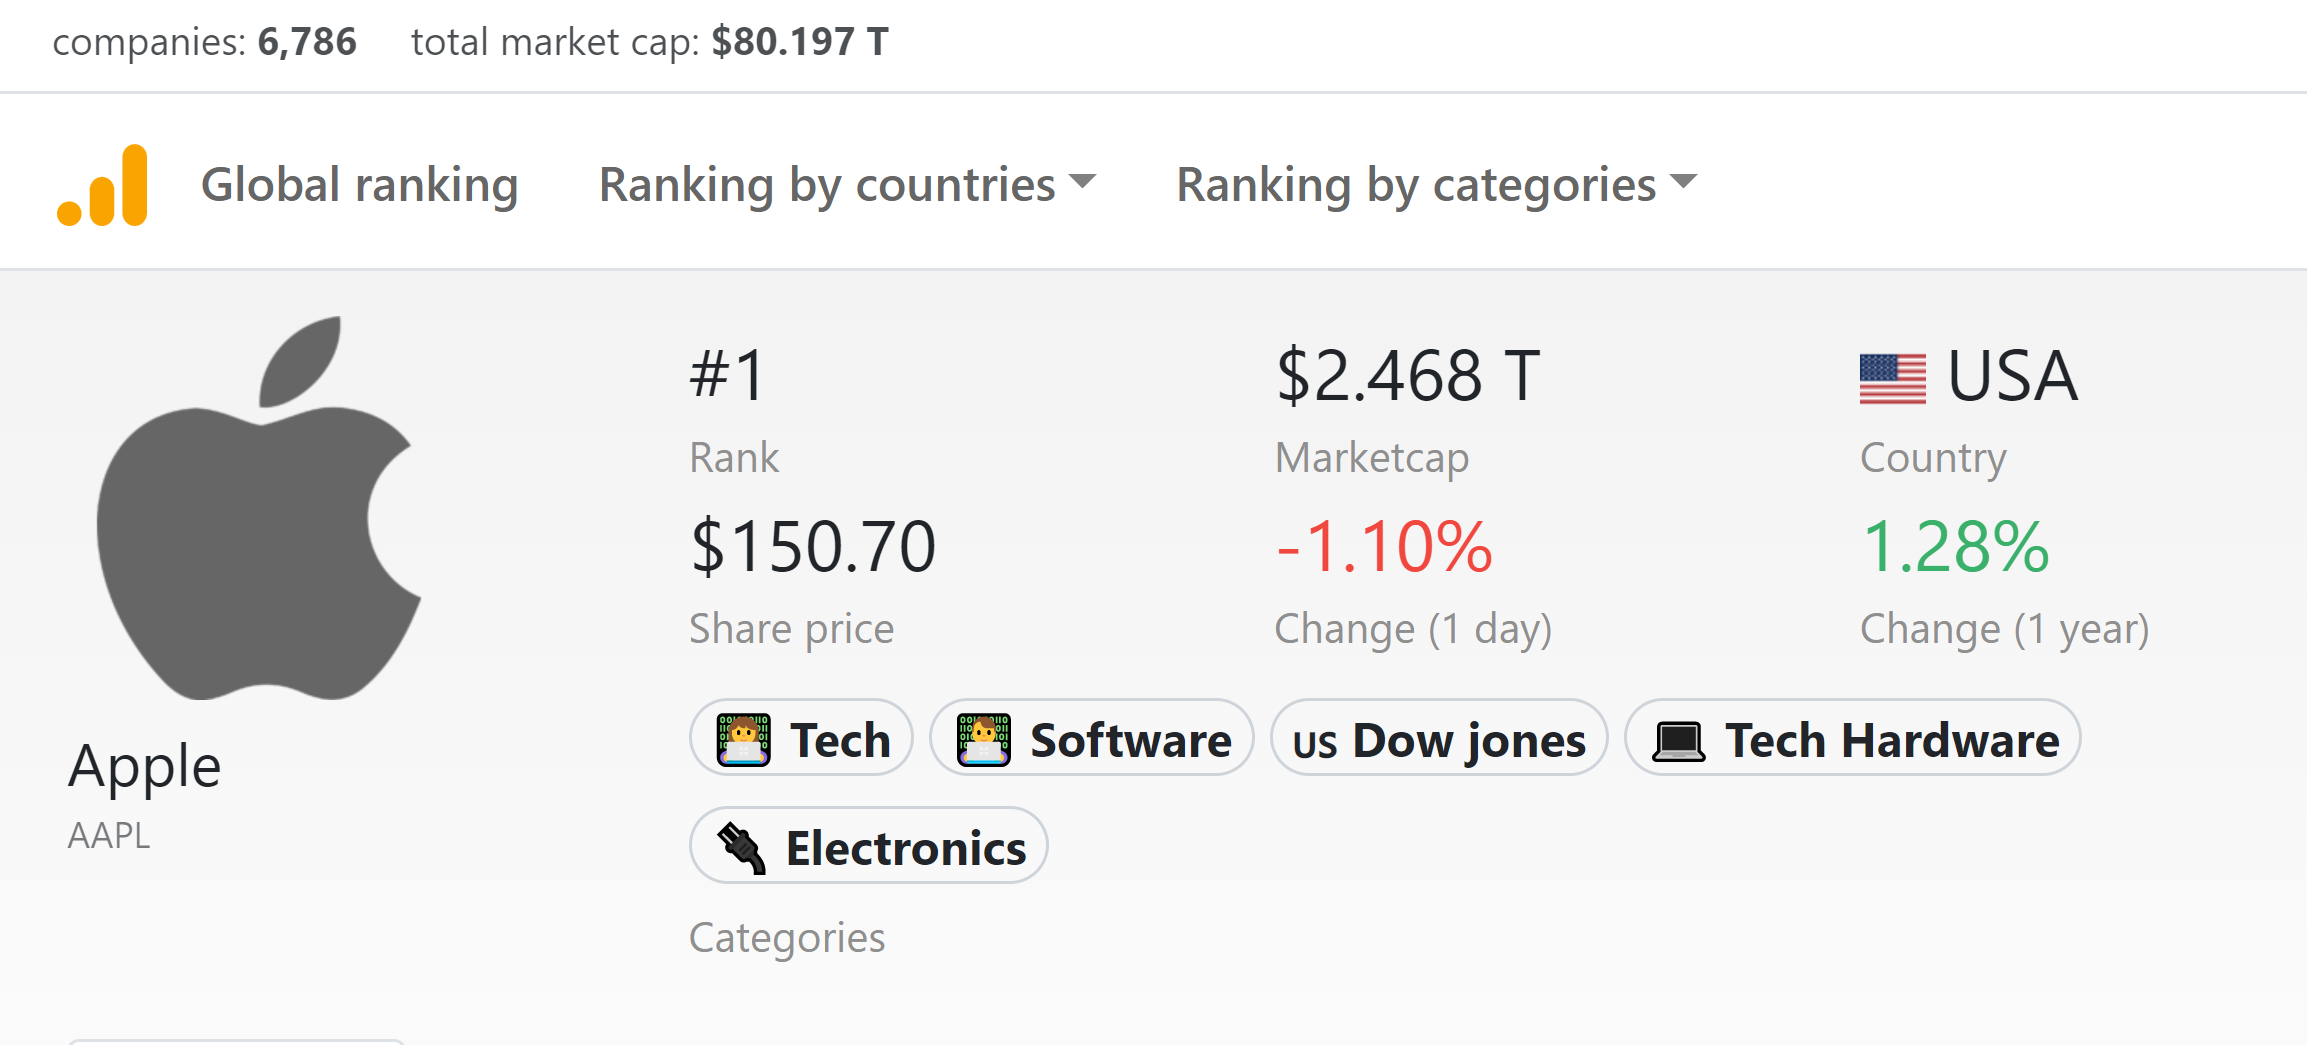
Notice how by clicking the link we can see the different categories Apple is a part of (which was not available on the previous page) such as Tech, Software, etc. This same data is available for all the companies.

Also see how the url changed when you clicked Apple. It went from ```/usa/largest-companies-in-the-usa-by-market-cap/``` to ```/apple/marketcap/```. The link redirects you to a different part of the webpage, and that redirected link can be found in the html in the ```href``` atribute of the `<a>` tag.
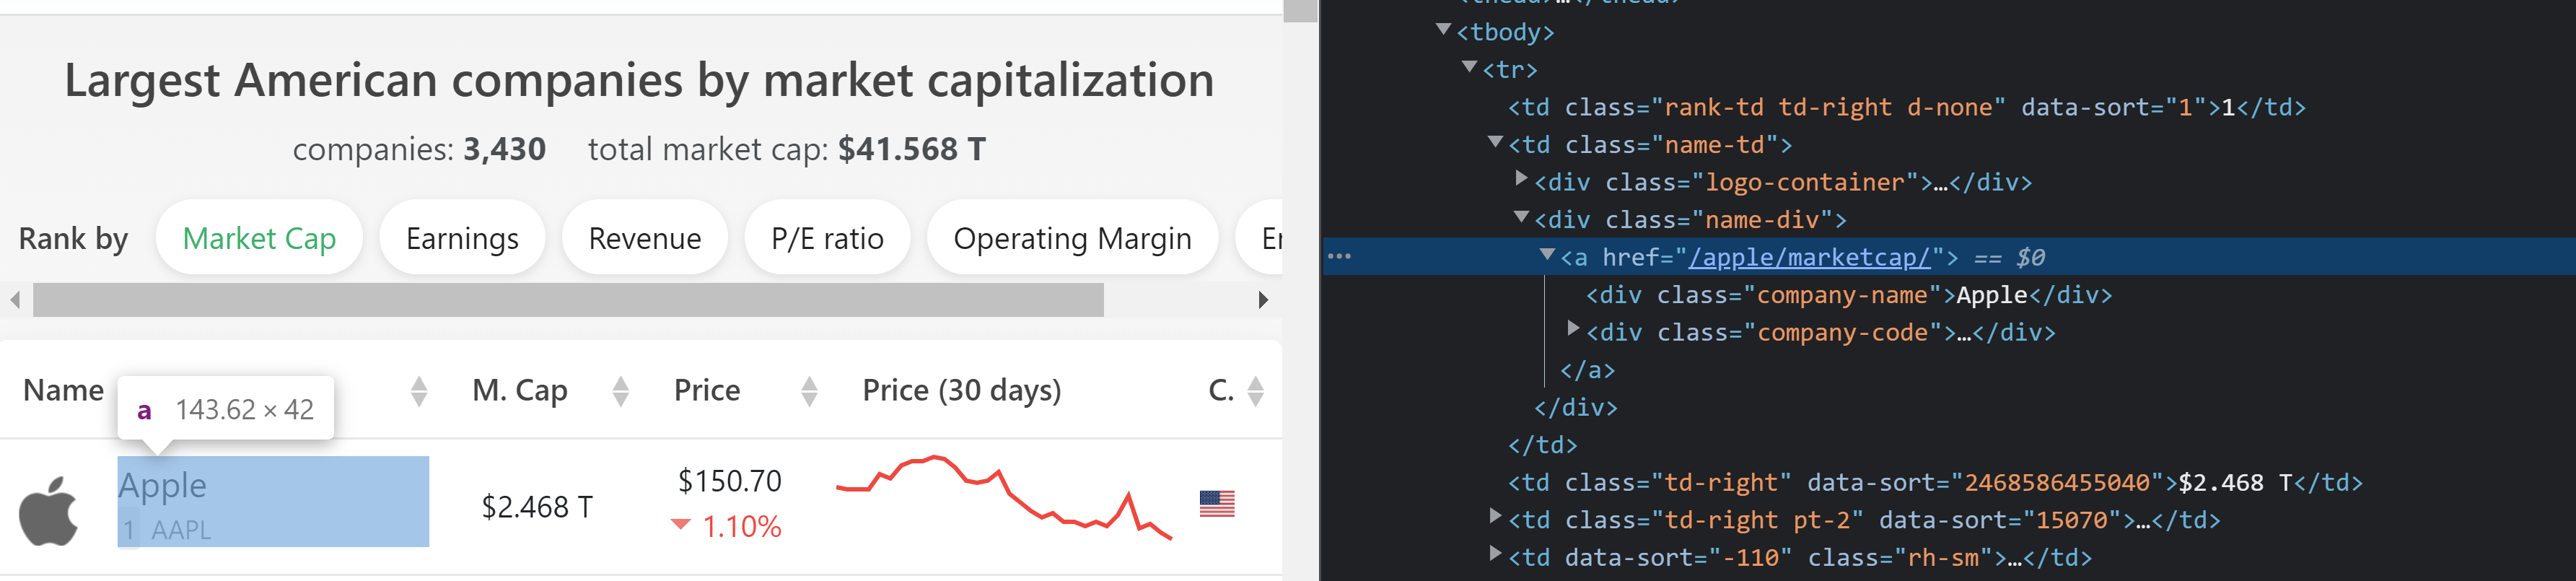
Keep this in mind for later!

Now that you have explored the webpage its time to get some data off of it!

The dataset we will be making has the following features/columns:

**company_name** - This is a column of all the company names

**company_stock_ticker** - This column has the respective stock ticker for the company

**company_mkt_cap** - The market capitalization values for all the companies are stored in this column

**company_categories** - The categories of each specific comapany (stored as a list, look below)
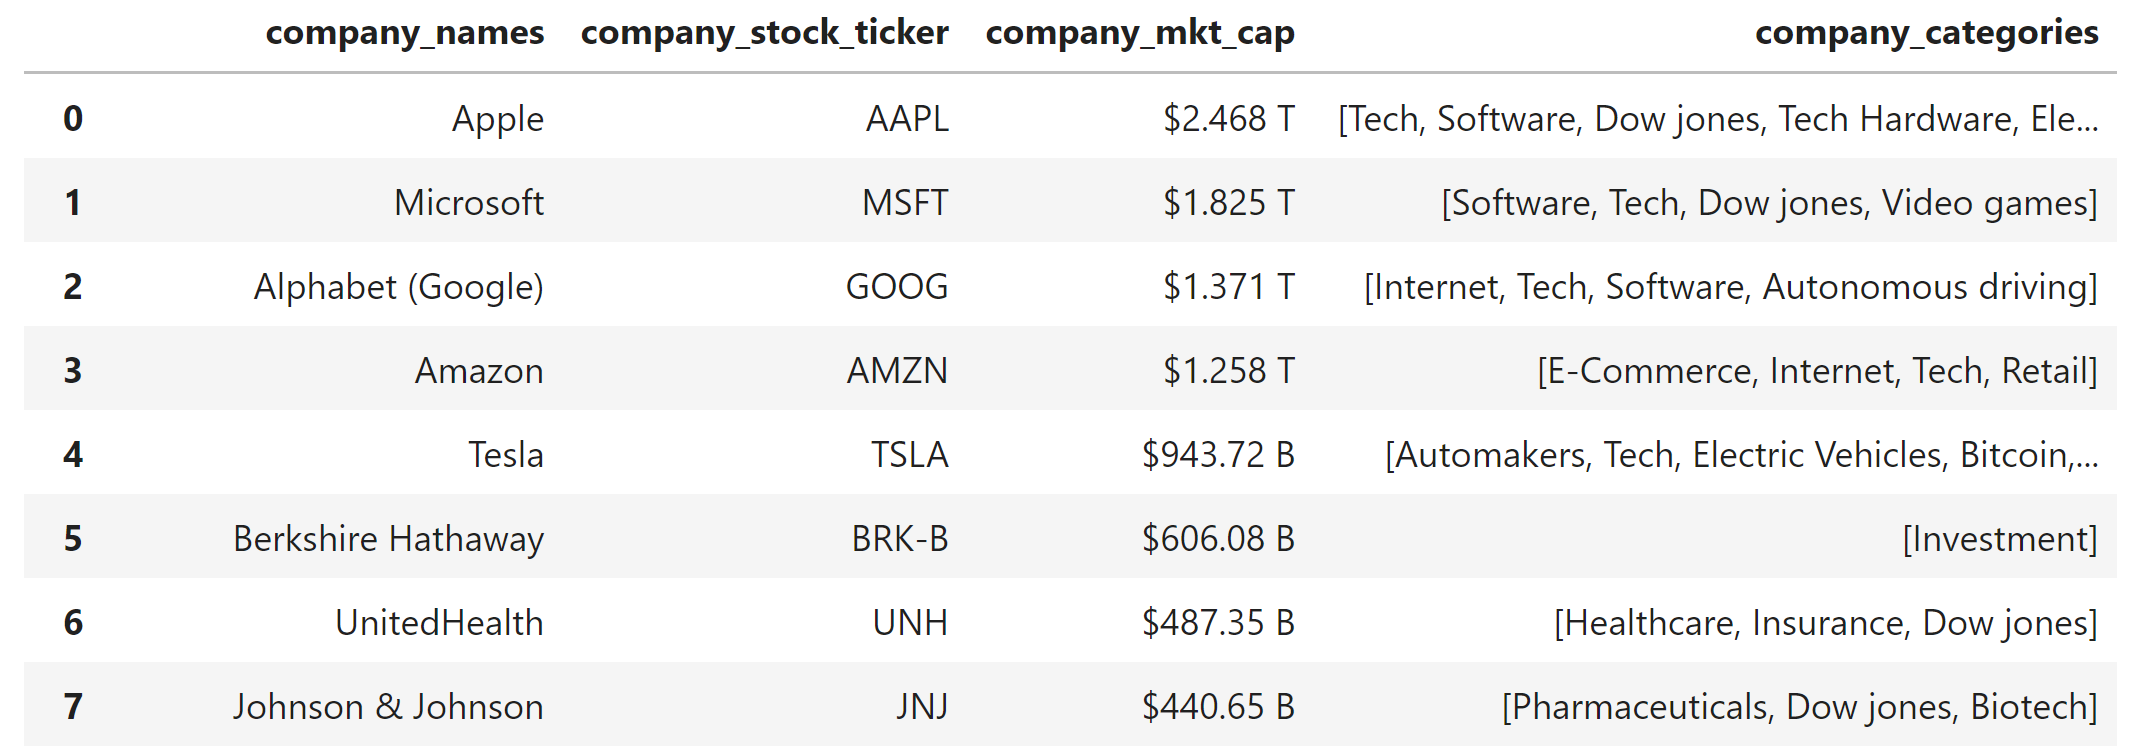
Though the screenshot above has only 10 comapnies we will be scraping the enitre page so the datasets we will make has 100 rows/companies. 


**IMPORTANT**: Though some parts of this assignment will be pretty easy and strightforward, other questions here **will** be challenging. To make it easier on you, some of the answers to a few of the questions in this assignment can be found on this google doc: https://docs.google.com/document/d/1YFg04YjMjoV55TSaBuv41sG2-YSyk4jtqn2N36QTwRk/edit?usp=sharing

**IF YOU END UP USING THE GOOGLE DOC TO GET THE ANSWER MAKE SURE TO EXPLAIN WHY THE CODE WORKS IN A SEPARATE MARKDOWN CELL**

**You will not get credit if you do not explain the answer**


Lets get started!

## Import Packages

**Q1)**  The first step is to import the packages. Import both Requests and BeautifulSoup

In [1]:
import requests
from bs4 import BeautifulSoup as bs



First lets make an empty list for each of the columns that we want (the columns of the dataset). I already did this:

NOTE: You do not have to do this you could just automatically convert it to a list while scraping (like what we did in class), if you want to do it that way make sure to name your variables the same way as below!!

In [2]:
company_names_lst = []
company_ticker_lst = []
market_cap_lst = []
categories_for_company_lst = []

**Q2)** Now make an http GET request to the url I provided above. Print out the status code to make sure it was successful.

In [3]:
response = requests.get("https://companiesmarketcap.com/usa/largest-companies-in-the-usa-by-market-cap/")
print(response.status_code)

200


**Q3)**  As a quick aside, what server is this webpage coming from?? Type the answer and the code you used to get it.

In [4]:
response.headers["Server"]

'cloudflare'

In [5]:
# The server name is: cloudflare

**Q4)** Now create a ```BeautifulSoup``` object that takes in the html that you just requested. 

In [6]:
soup = bs(response.content, 'html.parser')

**Q5)** First lets start off by populating the empty list for market cap `market_cap_lst`. Find the CSS Selector for getting all the market cap values and use ```BeautifulSoup``` to return all of these values. 

Note: If you are struggling to find the proper CSS Selector, you can use the Google Doc.

In [7]:
market_cap_lst = soup.select(".name-td+ .td-right")

print(market_cap_lst)

[<td class="td-right" data-sort="3296096681984"><span class="currency-symbol-left">$</span>3.296 T</td>, <td class="td-right" data-sort="3234487336960"><span class="currency-symbol-left">$</span>3.234 T</td>, <td class="td-right" data-sort="2835422642176"><span class="currency-symbol-left">$</span>2.835 T</td>, <td class="td-right" data-sort="1966587510784"><span class="currency-symbol-left">$</span>1.966 T</td>, <td class="td-right" data-sort="1961417768960"><span class="currency-symbol-left">$</span>1.961 T</td>, <td class="td-right" data-sort="1356780404736"><span class="currency-symbol-left">$</span>1.356 T</td>, <td class="td-right" data-sort="984291540992"><span class="currency-symbol-left">$</span>984.29 B</td>, <td class="td-right" data-sort="815948038144"><span class="currency-symbol-left">$</span>815.94 B</td>, <td class="td-right" data-sort="758829154304"><span class="currency-symbol-left">$</span>758.82 B</td>, <td class="td-right" data-sort="727962550272"><span class="curr

Great! Now that you have a list like object that has the market caps but it is all stored in a ```<td>``` tag.

Time for a True or False question because why not:

**Q6)** (T/F) Is there are quick and easy way to get all the market cap values from each of the elements in the list? (aka do we need to loop through all these element to get the values or can we just use a method provided by ```BeautifulSoup``` to do this). Explain your answer

In [8]:
# True or False? Answer: True
# Explanation: We can get all the needed values and store them into the list using map() function, extracting the
# information from specific tags

**Q7)** Extract all the market cap values into a list

In [9]:
def match(a):
    return a.get_text()

market_cap_lst = list(map(match, soup.select(".name-td+ .td-right")))

print(market_cap_lst)

['$3.296 T', '$3.234 T', '$2.835 T', '$1.966 T', '$1.961 T', '$1.356 T', '$984.29 B', '$815.94 B', '$758.82 B', '$727.96 B', '$631.80 B', '$595.34 B', '$567.34 B', '$533.69 B', '$507.28 B', '$464.05 B', '$462.83 B', '$413.26 B', '$402.49 B', '$402.17 B', '$380.66 B', '$341.69 B', '$309.44 B', '$306.89 B', '$303.38 B', '$299.84 B', '$260.25 B', '$244.09 B', '$243.96 B', '$242.94 B', '$240.18 B', '$234.60 B', '$231.23 B', '$210.71 B', '$205.53 B', '$201.97 B', '$199.35 B', '$197.24 B', '$195.53 B', '$191.59 B', '$188.67 B', '$187.93 B', '$185.55 B', '$185.53 B', '$183.87 B', '$183.71 B', '$181.13 B', '$178.82 B', '$174.64 B', '$174.61 B', '$171.50 B', '$169.03 B', '$168.40 B', '$165.06 B', '$161.93 B', '$157.93 B', '$156.16 B', '$155.47 B', '$154.46 B', '$153.28 B', '$152.90 B', '$152.11 B', '$150.49 B', '$145.63 B', '$141.74 B', '$136.55 B', '$135.52 B', '$134.90 B', '$133.98 B', '$132.68 B', '$128.34 B', '$127.10 B', '$126.32 B', '$125.75 B', '$122.97 B', '$120.90 B', '$119.70 B', '$11

Below is code that extracts both the company name and company ticker from the webapge and store it into the list ```total_lst```. Before you continue, explore how each element of ```total_lst``` looks like

In [10]:
total_lst = soup.select(".name-div")

total_lst

[<div class="name-div"><a href="/apple/marketcap/"><div class="company-name">Apple</div><div class="company-code"><span class="rank d-none"></span>AAPL</div></a></div>,
 <div class="name-div"><a href="/microsoft/marketcap/"><div class="company-name">Microsoft</div><div class="company-code"><span class="rank d-none"></span>MSFT</div></a></div>,
 <div class="name-div"><a href="/nvidia/marketcap/"><div class="company-name">NVIDIA</div><div class="company-code"><span class="rank d-none"></span>NVDA</div></a></div>,
 <div class="name-div"><a href="/alphabet-google/marketcap/"><div class="company-name">Alphabet (Google)</div><div class="company-code"><span class="rank d-none"></span>GOOG</div></a></div>,
 <div class="name-div"><a href="/amazon/marketcap/"><div class="company-name">Amazon</div><div class="company-code"><span class="rank d-none"></span>AMZN</div></a></div>,
 <div class="name-div"><a href="/meta-platforms/marketcap/"><div class="company-name">Meta Platforms (Facebook)</div><div

**Q7)** Now that you have explored how each element of ```total_lst``` is, extract the company name and the company ticker and add them to their corresponding lists. 

Hint, use ```.string``` for the company name and ```.text``` for company code. Also, the answer is in the Google Doc.

In [11]:
#company_names_lst = list(map(lambda x: x.string, soup.select(".company-name")))

#print(company_names_lst)

#company_ticker_lst = list(map(match, soup.select(".company-code")))

#print(company_ticker_lst)

for tag in total_lst:
    company_names_lst.append(tag.div.string) #appends the list with extracted string from a div tag element
    company_ticker_lst.append(tag.a.select('.company-code')[0].text) #accesses first element "company code" inside <a> tags and appends list with its text  

print(company_names_lst)
print(company_ticker_lst)


['Apple', 'Microsoft', 'NVIDIA', 'Alphabet (Google)', 'Amazon', 'Meta Platforms (Facebook)', 'Berkshire Hathaway ', 'Eli Lilly', 'Broadcom', 'Tesla', 'Walmart', 'JPMorgan Chase', 'Visa', 'UnitedHealth', 'Exxon Mobil', 'Oracle', 'Mastercard', 'Procter & Gamble', 'Costco', 'Johnson & Johnson', 'Home Depot', 'AbbVie', 'Coca-Cola', 'Bank of America ', 'Netflix', 'Merck', 'Chevron', 'AMD', 'Salesforce', 'Pepsico', 'T-Mobile US', 'Thermo Fisher Scientific', 'Adobe', 'McDonald', 'Abbott Laboratories', 'Cisco', 'Danaher', 'IBM', 'General Electric', 'Philip Morris', 'American Express', 'QUALCOMM', 'Verizon', 'Wells Fargo', 'Texas Instruments', 'ServiceNow', 'Intuit', 'Amgen', 'Nextera Energy', 'Intuitive Surgical', 'Caterpillar', 'Pfizer', 'Walt Disney', 'S&P Global', 'Morgan Stanley', 'Raytheon Technologies', 'AT&T', 'Applied Materials', 'Union Pacific Corporation', 'Goldman Sachs', 'Uber', 'Comcast', 'Progressive', "Lowe's Companies", 'Stryker Corporation', 'Lockheed Martin', 'Booking Holding

Below is code to get the first element of ```total_lst``` nothing too fancy

In [12]:
total_lst[0]

<div class="name-div"><a href="/apple/marketcap/"><div class="company-name">Apple</div><div class="company-code"><span class="rank d-none"></span>AAPL</div></a></div>

**Q8)** For this first element get the ```href``` attribute

In [13]:
total_lst[0].a.attrs['href']

'/apple/marketcap/'

Answer this question before continuing:

**Q9)** What is the href attribute and why does it not return the full website name but only the ending of it?

In [14]:
#Answer: because href is responsible only for local object, so we need to concatenate it with base url

**Q10)** Now add the string form the href attribute to the ```base_url``` and then make an http GET request with this new URL. Print out the status code and pass in this html to a new ```BeautifulSoup``` object.

Note: This is not a trick question, you already did this above

In [15]:
base_url = "https://companiesmarketcap.com/"
apple_url = base_url + total_lst[0].a.attrs['href']

response1 = requests.get(apple_url)
print(response1.status_code)

soup1 = bs(response1.content, 'html.parser')

200


**Q11)** Now, using the SelectorGadget chrome extension (or any other tool) find the CSS selector for all the categories the comapany is a part of (in green), as explained in the pre-reocrded videos.
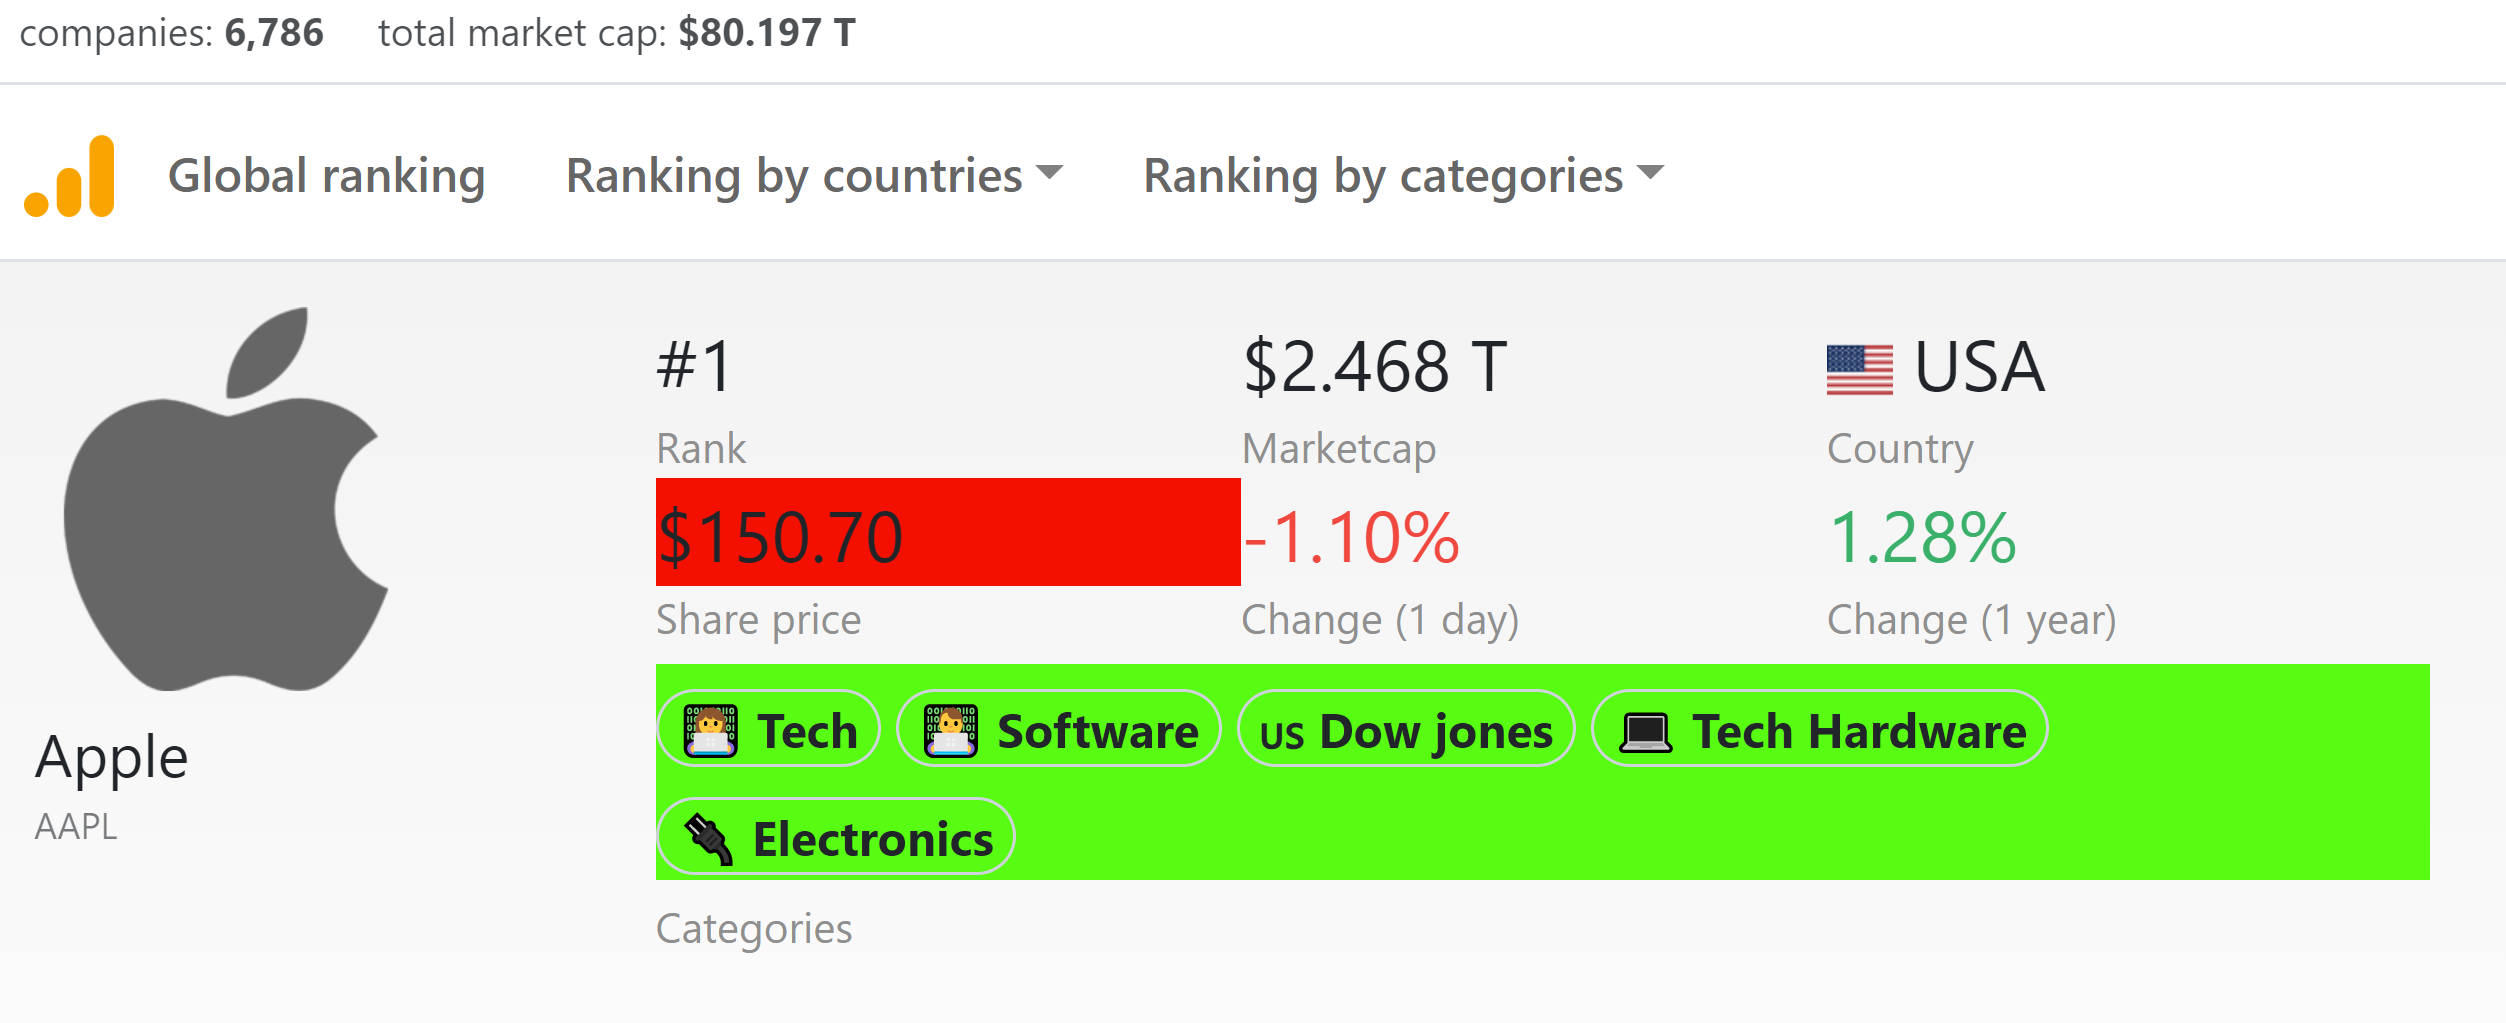

Note: The CSS Selector can be found in the Google Doc.

In [16]:
#.categories-box .line1


**Q12)** Now **ONLY** for the current webpage, return a list with each of the categories.

After you run the code below the return output should be a list that looks something like this: ```['Tech', 'Software', 'Dow jones', 'Tech Hardware', 'Electronics']```

Note: You can find the answer in the Google Doc.

In [17]:
industries = soup1.select('.categories-box .line1') #finds all elements which match given css selector
industries_lst = [] # initializes a list

def list_categories(m):
    industries_lst_temp = []
    for element in m[0].find_all("a"): # find all <a> tags in the first element of industries and iterate through them as a list of bs objects
        industries_lst_temp.append("".join(x for x in element.string.strip() if x.isalpha() or x == ' ').strip()) 
        #concatenates elements which are alphabetic or spaces, removing trailing spaces and other characters, and appends the list with it
    industries_lst.append(industries_lst_temp)
list_categories(industries)

print(industries_lst)


[['Tech', 'Software', 'Dow jones', 'Tech Hardware', 'Electronics', 'AI']]


**Q13)** Applying what we just did till now, populate the ```categories_for_company_lst``` list with the corresponding categories for each of the 100 companies. After running you code, the ```categories_for_company_lst``` should be a list of lists like this:
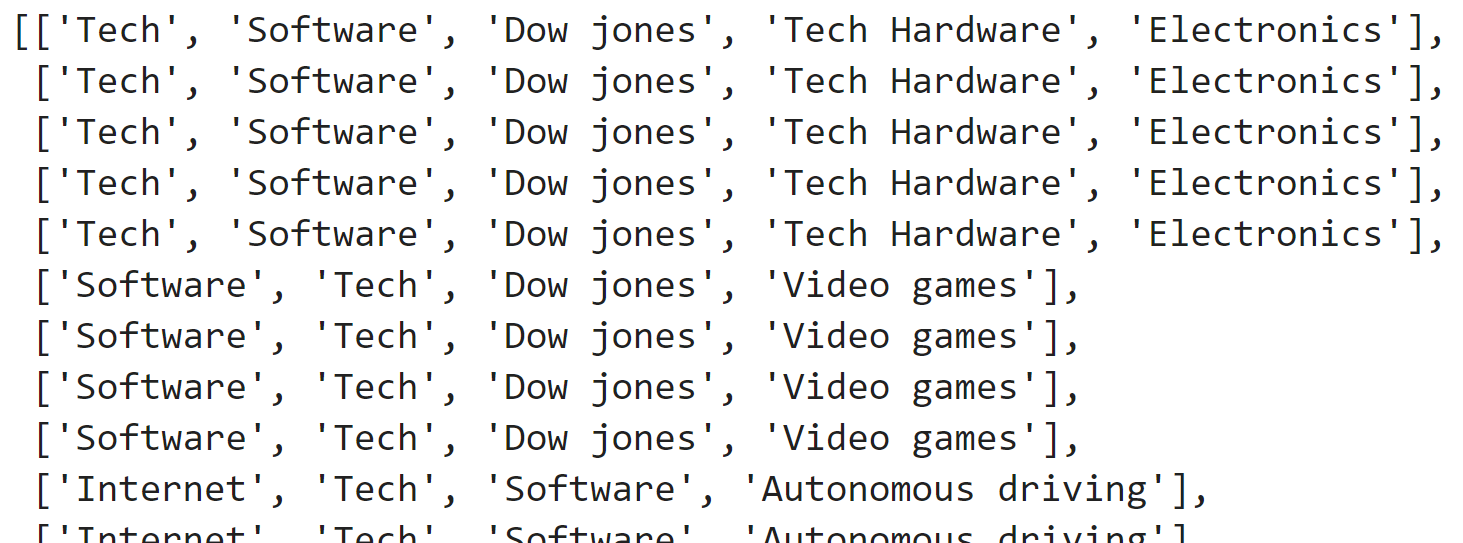

Note: This is not a trick question, you already did this above.

In [18]:
industries_lst = []
for index, company in enumerate(total_lst):
    url = base_url + total_lst[index].a.attrs['href']
    response2 = requests.get(url)
    soup2 = bs(response2.content, 'html.parser')
    industries2 = soup2.select('.categories-box .line1')
    
    list_categories(industries2)

print(industries_lst)


'''
You need to write a loop which concatenates the full link to each company,
requests information, creates bs object for each company, finds all the needed information in <a> tags,
clears the categories from all of the images and appends lists to the general categories_for_company_lst. My code
repeats previous categories in every next element. 
'''

[['Tech', 'Software', 'Dow jones', 'Tech Hardware', 'Electronics', 'AI'], ['Software', 'Tech', 'Dow jones', 'Video games', 'AI'], ['Tech', 'Semiconductors', 'Electronics', 'Tech Hardware', 'Autonomous driving', 'AI'], ['Internet', 'Tech', 'Software', 'Autonomous driving', 'AI'], ['ECommerce', 'Internet', 'Tech', 'Retail', 'Dow jones'], ['Tech', 'Internet', 'AI'], ['Investment'], ['Pharmaceuticals', 'Biotech'], ['Semiconductors', 'Tech'], ['Automakers', 'Tech', 'Electric Vehicles', 'Bitcoin', 'Manufacturing', 'EV charging', 'Autonomous driving', 'AI'], ['Retail', 'Dow jones', 'Supermarket Chains'], ['Banks', 'Financial services', 'Dow jones'], ['Financial services', 'Dow jones'], ['Healthcare', 'Insurance', 'Dow jones'], ['OilGas', 'Energy'], ['Software', 'Tech'], ['Financial services'], ['Consumer goods', 'Dow jones'], ['Retail', 'Supermarket Chains'], ['Pharmaceuticals', 'Dow jones', 'Biotech'], ['Retail', 'Dow jones'], ['Pharmaceuticals', 'Biotech'], ['Beverages', 'Dow jones'], ['Ban

'\nYou need to write a loop which concatenates the full link to each company,\nrequests information, creates bs object for each company, finds all the needed information in <a> tags,\nclears the categories from all of the images and appends lists to the general categories_for_company_lst. My code\nrepeats previous categories in every next element. \n'

Awesome, now you have lists of all the data we want. In other words, ```categories_for_company_lst```, ```company_names_lst```, ```company_ticker_lst```, ```market_cap_lst```, are all populated with their respective data points. The code below uses the ```pandas``` library to take all the data we just got and puts it into a dataframe. The focus of this week is not the ```pandas``` library, so I do not expect you to know how the code below works. But we will be discussing the `pandas` library in detail during a later week.

**MAKE SURE TO STILL RUN THE CODE BELOW** this way I can make sure you did everything properly.

In [19]:
#if you dont have the pandas library installed then run this cell
! pip install pandas

In [20]:
import pandas as pd

data = dict()

lst = [company_names_lst, company_ticker_lst, market_cap_lst, industries_lst]
names = ["company_names", "company_stock_ticker", "company_mkt_cap", "industries_categories"]

for i in range(len(lst)):
    data[names[i]] = lst[i]

df = pd.DataFrame(data=data)
df.head(25)

,company_names,company_stock_ticker,company_mkt_cap,industries_categories
0,Apple,AAPL,$3.296 T,"[Tech, Software, Dow jones, Tech Hardware, Ele..."
1,Microsoft,MSFT,$3.234 T,"[Software, Tech, Dow jones, Video games, AI]"
2,NVIDIA,NVDA,$2.835 T,"[Tech, Semiconductors, Electronics, Tech Hardw..."
3,Alphabet (Google),GOOG,$1.966 T,"[Internet, Tech, Software, Autonomous driving,..."
4,Amazon,AMZN,$1.961 T,"[ECommerce, Internet, Tech, Retail, Dow jones]"
5,Meta Platforms (Facebook),META,$1.356 T,"[Tech, Internet, AI]"
6,Berkshire Hathaway,BRK-B,$984.29 B,[Investment]
7,Eli Lilly,LLY,$815.94 B,"[Pharmaceuticals, Biotech]"
8,Broadcom,AVGO,$758.82 B,"[Semiconductors, Tech]"
9,Tesla,TSLA,$727.96 B,"[Automakers, Tech, Electric Vehicles, Bitcoin,..."


Make sure to push everything to your repository!